 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_path = Path("Resources/whale_returns.csv")

In [3]:
whale_returns_csv = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_csv.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_csv = whale_returns_csv.dropna()
whale_returns_csv.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_path ,index_col='Date',infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
algo_returns_csv.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_csv = algo_returns_csv.dropna()
algo_returns_csv.isna().sum()
algo_returns_csv

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("Resources/sp_tsx_history.csv")
sp_returns = pd.read_csv(sp_tsx_path,index_col='Date', infer_datetime_format=True, parse_dates=True)

In [11]:
# Check Data Types
sp_returns.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_returns["Close"] = sp_returns["Close"].str.replace("$","")
sp_returns["Close"] = sp_returns["Close"].str.replace(",","")
sp_returns["Close"] = sp_returns["Close"].astype("float")
sp_returns.dtypes

C:\Users\ritwi\AppData\Local\Temp/ipykernel_8116/3291437998.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_returns["Close"] = sp_returns["Close"].str.replace("$","")


Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_returns = sp_returns.pct_change()
sp_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_returns.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns.rename(columns={"Close": "S&P 500"}, inplace=True)
sp_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_csv, algo_returns_csv, sp_returns], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

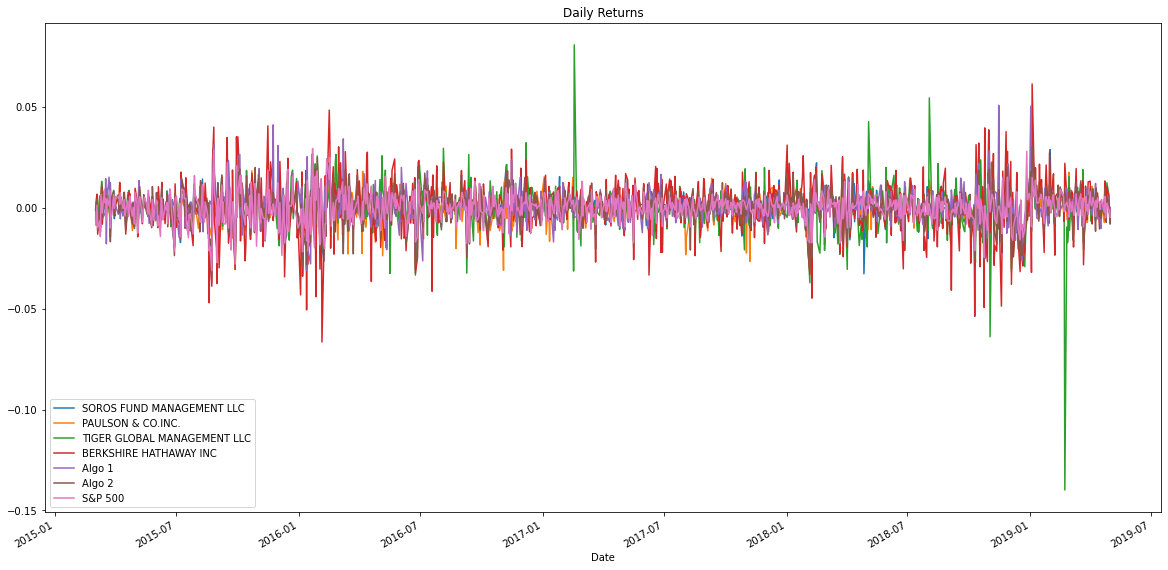

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(title="Daily Returns", figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

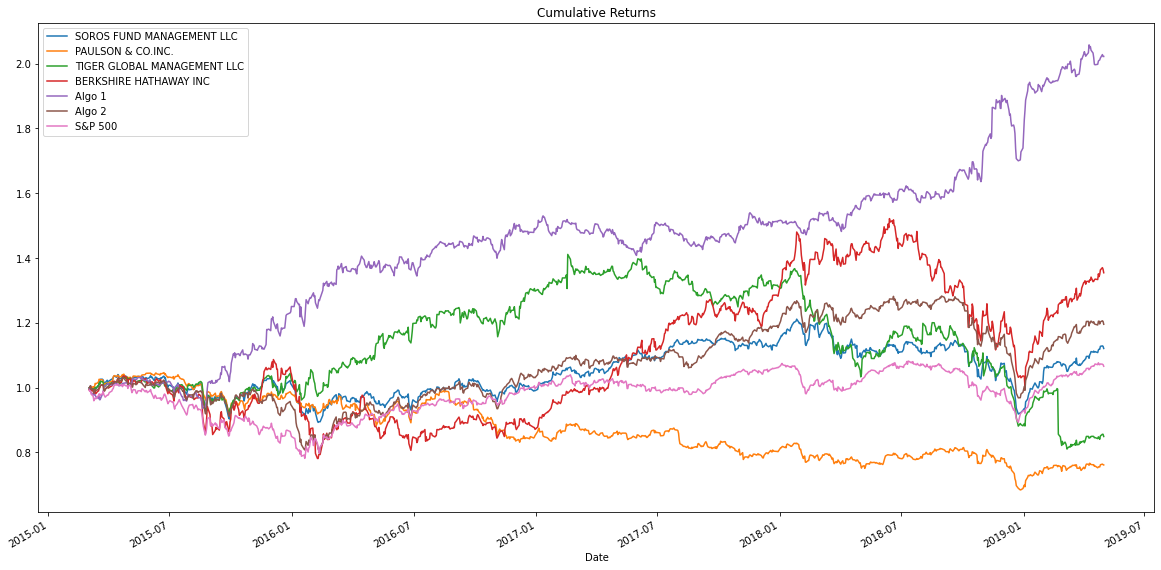

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns", figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Portfolio Risk')

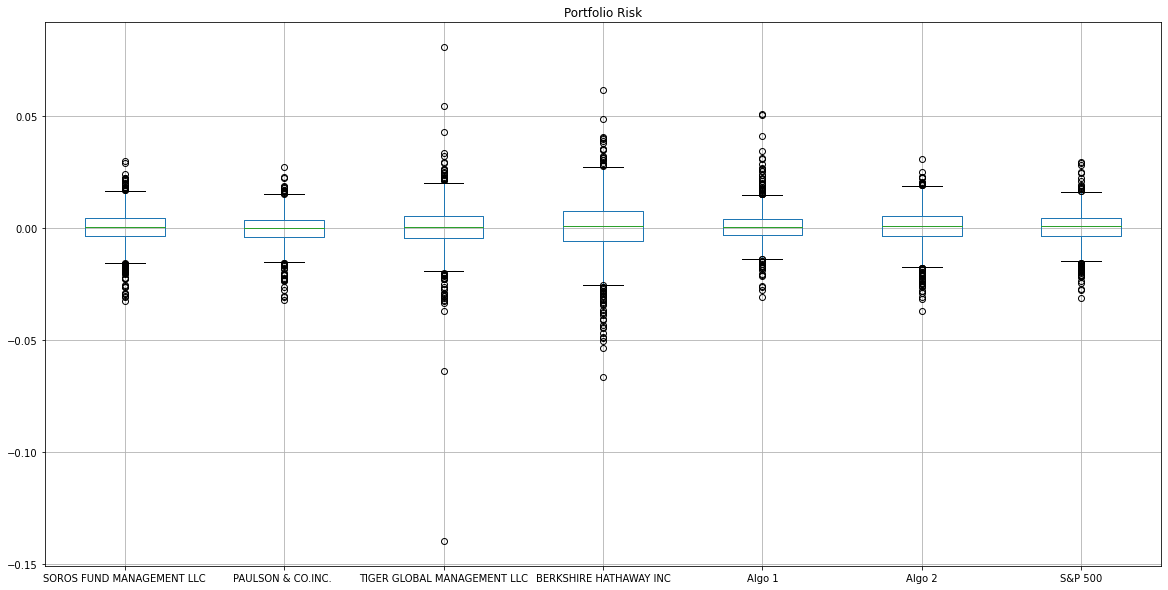

In [19]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20,10)).set_title("Portfolio Risk")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P 500                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
combined_daily_std["S&P 500"].std()

# Determine which portfolios are riskier than the S&P TSX 60
index_num = 0
for portfolio in combined_daily_std:
    if portfolio > combined_daily_std["S&P 500"]:
        true_false = "True"
        print(f"{combined_daily_std.index[index_num]:<30}{true_false:>6}")
    else:
        true_false = "False"
        print(f"{combined_daily_std.index[index_num]:<30}{true_false:>6}")
    index_num += 1

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P 500                        False


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_combined_std = combined_daily_std * np.sqrt(252)
annualized_combined_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P 500                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

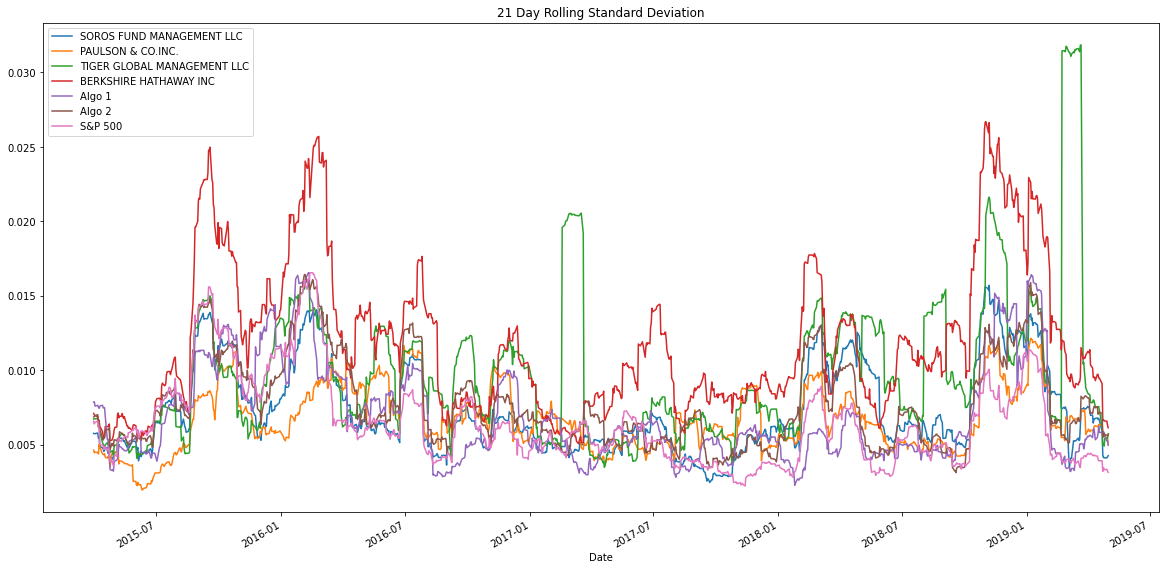

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
print(combined_returns.rolling(window=21).std())
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

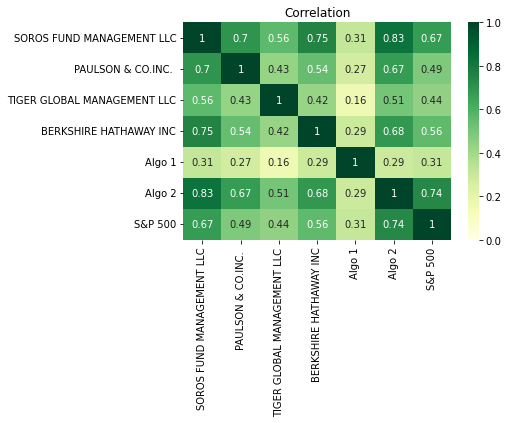

In [24]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=0, vmax=1, cmap="YlGn", annot=True).set_title("Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Berkshire Hathaway Inc Beta'}, xlabel='Date'>

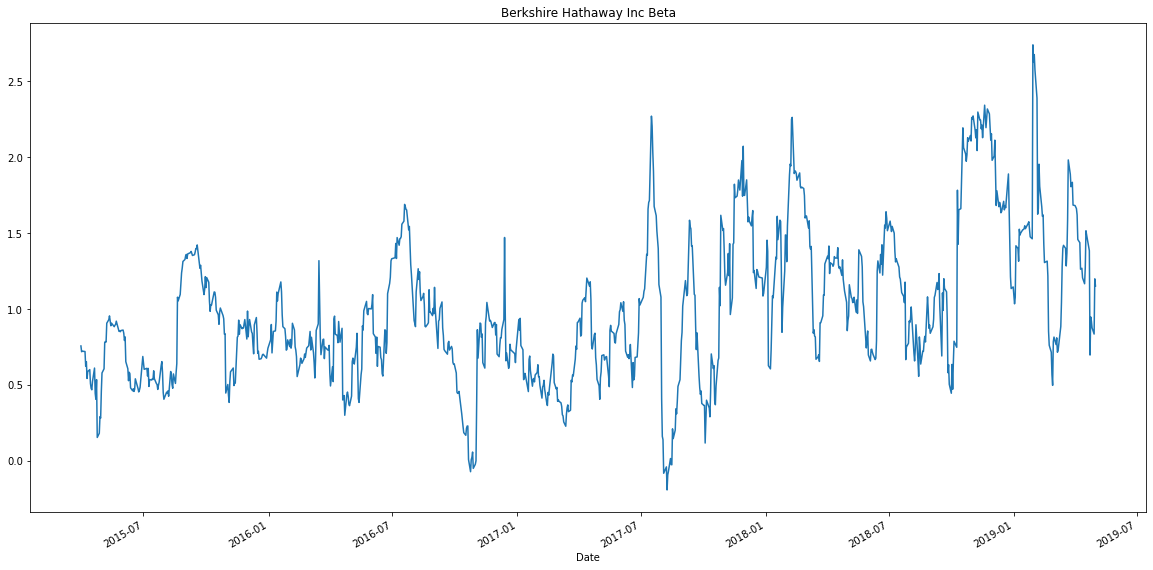

In [25]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P 500'])

# Calculate variance of S&P TSX
rolling_variance = combined_returns['S&P 500'].rolling(window=21).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

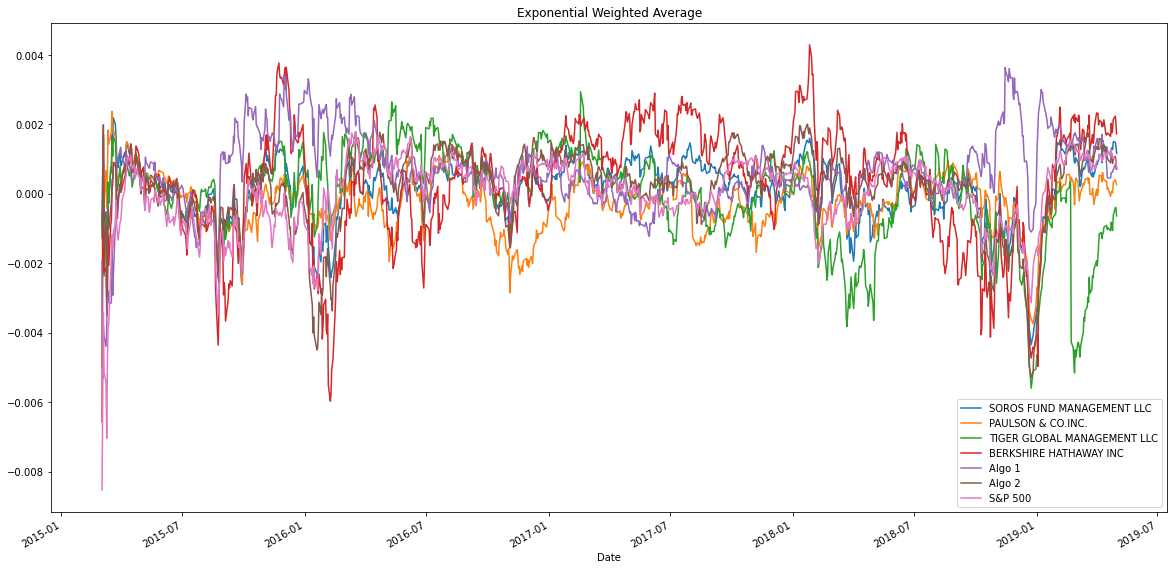

In [26]:
# Use `ewm` to calculate the rolling window
expo_rolling_window = combined_returns.ewm(halflife=21).mean()
expo_rolling_window.plot(figsize=(20,10), title="Exponential Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P 500                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

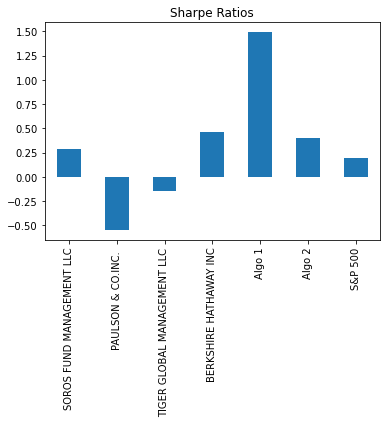

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
shop_csv = Path("shop_historical.csv")
shop_data = pd.read_csv(shop_csv, parse_dates=True, infer_datetime_format=True)
shop_data["Date"] = shop_data["Date"].str.split(" ", n=1, expand=True)
shop_data["Date"] = pd.to_datetime(shop_data["Date"], yearfirst=True, infer_datetime_format=True)
shop_data = shop_data.set_index("Date")
shop_data.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [30]:
# Reading data from 2nd stock
i_csv = Path("l_historical.csv")
i_data = pd.read_csv(i_csv, parse_dates=True, infer_datetime_format=True)
i_data["Date"] = i_data["Date"].str.split(" ", n=1, expand=True)
i_data["Date"] = pd.to_datetime(i_data["Date"], yearfirst=True, infer_datetime_format=True)
i_data = i_data.set_index("Date")
i_data.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [31]:
# Reading data from 3rd stock
otex_csv = Path("otex_historical.csv")
otex_data = pd.read_csv(otex_csv, parse_dates=True, infer_datetime_format=True)
otex_data["Date"] = otex_data["Date"].str.split(" ", n=1, expand=True)
otex_data["Date"] = pd.to_datetime(otex_data["Date"], yearfirst=True, infer_datetime_format=True)
otex_data = otex_data.set_index("Date")
otex_data.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [32]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([shop_data, i_data, otex_data], axis="columns", join="inner")
combined_data.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [34]:
# Reset Date index
combined_data.drop(columns = ['Symbol', 'Symbol', 'Symbol'], inplace = True)
combined_data

,Close,Close,Close
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16
...,...,...,...
2019-12-20,513.22,67.90,58.68
2019-12-23,511.62,67.68,57.89
2019-12-24,525.39,67.67,57.44


In [35]:
# Reorganize portfolio data by having a column per symbol
combined_data.columns = ['SHOP', 'L', 'OTEX']
combined_data.head()

,SHOP,L,OTEX
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [36]:
# Calculate daily returns
daily_returns = combined_data.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,SHOP,L,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = daily_returns.dot(weights)

# Display sample data
portfolio_weighted_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns = pd.concat([combined_returns, portfolio_weighted_returns], axis="columns", join="inner")
all_portfolios_returns.rename(columns={0: "Custom"}, inplace=True)
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
portfolios_risk = all_portfolios_returns.std() * np.sqrt(252)
portfolios_risk

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P 500                        0.099121
Custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                        NaN                 NaN   
2018-01-04                        NaN                 NaN   
2018-01-05                        NaN                 NaN   
2018-01-08                        NaN                 NaN   
2018-01-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                          NaN             

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

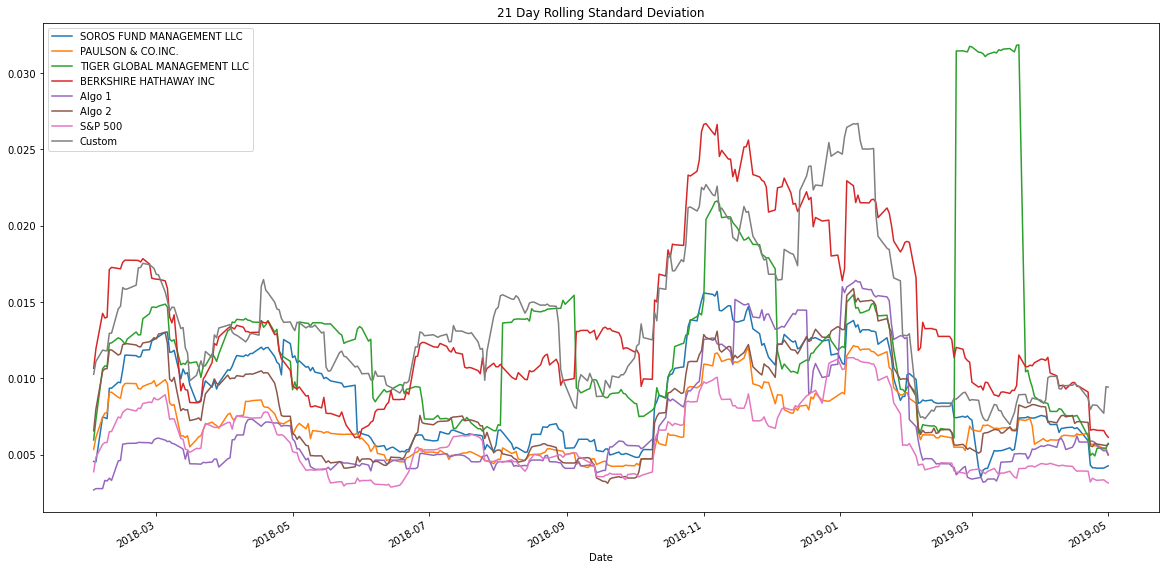

In [41]:
# Calculate rolling standard deviation
print(all_portfolios_returns.rolling(window=21).std())

# Plot rolling standard deviation
all_portfolios_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Portfolios Correlations')

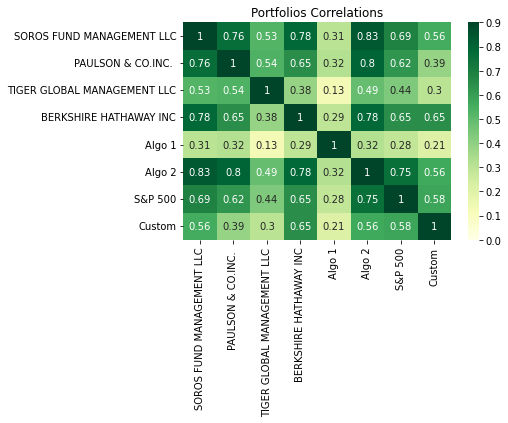

In [42]:
# Calculate and plot the correlation
all_correlations = all_portfolios_returns.corr()
sns.heatmap(all_correlations, vmin=0, vmax=0.9, cmap="YlGn", annot=True).set_title("Portfolios Correlations")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Beta for Custom Portfolio'}, xlabel='Date'>

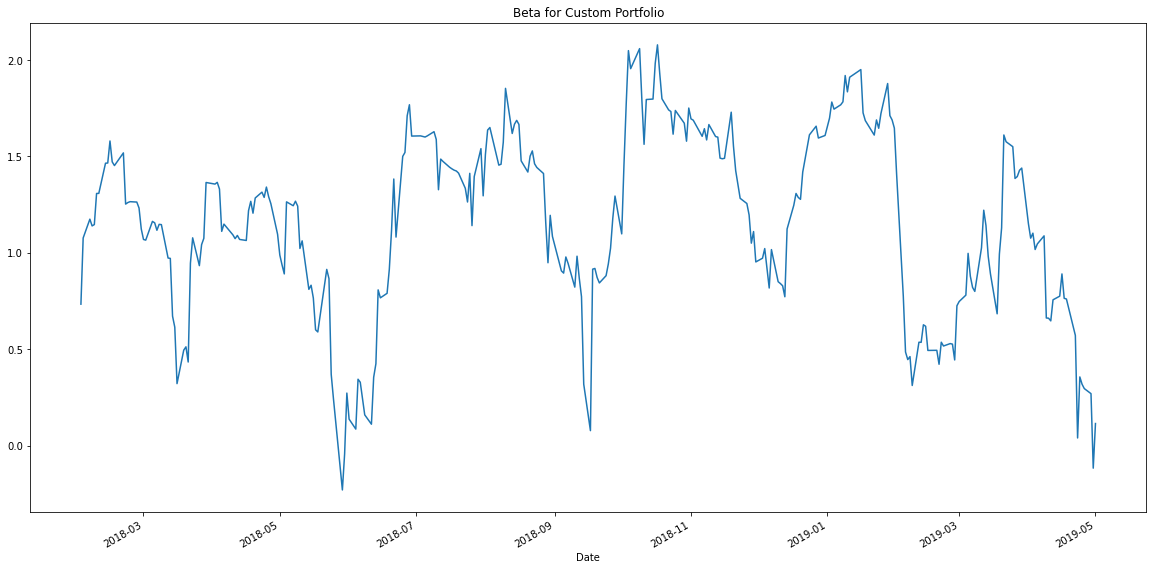

In [43]:
# Calculate and plot Beta
custom_rolling_covariance = all_portfolios_returns['Custom'].rolling(window=21).cov(all_portfolios_returns['S&P 500'])
custom_rolling_variance = all_portfolios_returns['S&P 500'].rolling(window=21).var()
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(20,10), title="Beta for Custom Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
all_annualized_sharpe_ratios = (all_portfolios_returns.mean() * 252) / (portfolios_risk)
all_annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P 500                        0.034651
Custom                         1.564547
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

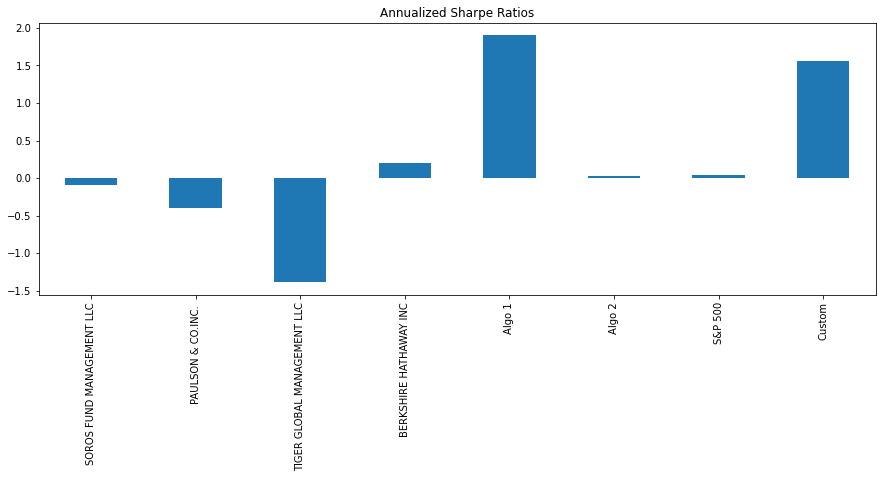

In [45]:
# Visualize the sharpe ratios as a bar plot
all_annualized_sharpe_ratios.plot(kind='bar', figsize=(15,5), title='Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!